In [102]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# fix the current import path
import sys, os
cwd = os.getcwd()
cdir = os.path.abspath(os.path.join(cwd,".."))
sys.path.insert(0, cdir)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from temporalanalysis.temporal_analysis_ab import compute_avg_behavior, plot_avg_behavior, load_dataset, compute_phase_matrix, plot_phase_matrix, plot_avg_rssi,testbed_phase_matrix
from spatialreuse import compute_spatial_reuse

# setup matplotlib parameters
import matplotlib
matplotlib.matplotlib_fname()
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 12

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Link quality

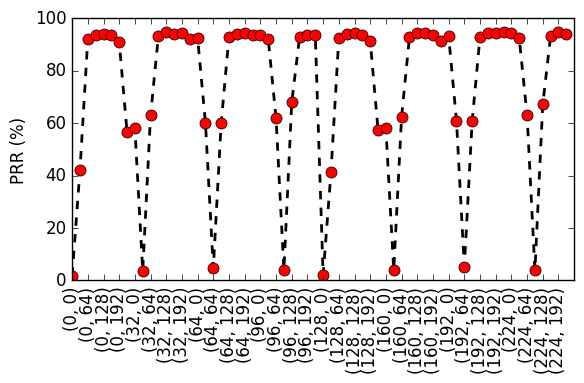

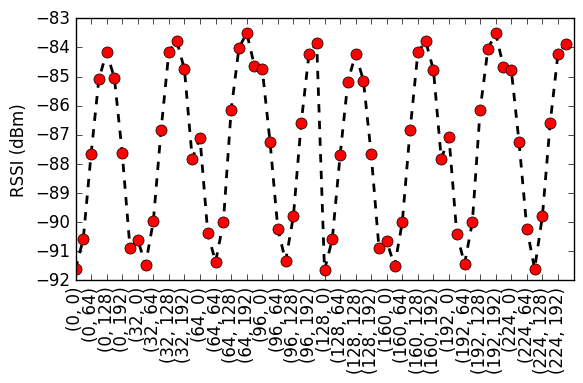

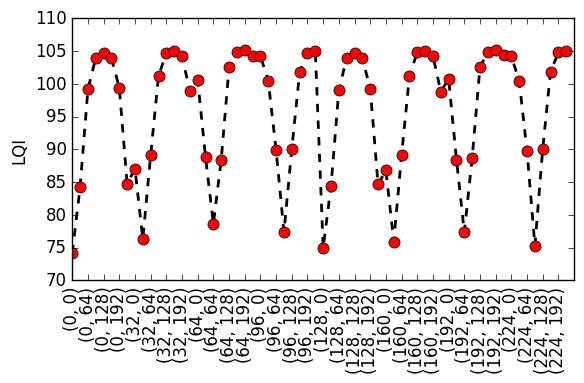

In [14]:
node = 0
fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE%d.csv'% node
#fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteD/2016-10-07_NODE%d.csv'% node
#fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteB/2016-10-04_NODE%d.csv'% node

df = load_dataset(fn)
prrfig, rssifig, lqifig = plot_avg_behavior(df)
prrfig.savefig('figures/links/prr_moteA_pwr7_ch11_node%d.pdf' % node)
rssifig.savefig('figures/links/rssi_moteA_pwr7_ch11_node%d.pdf' % node)
lqifig.savefig('figures/links/lqi_moteA_pwr7_ch11_node%d.pdf' % node)

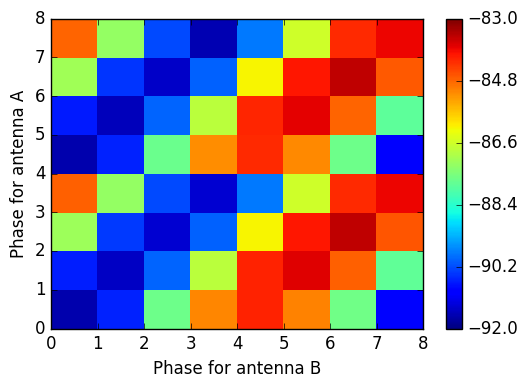

In [13]:
C = compute_phase_matrix(df)
plot_phase_matrix(C)

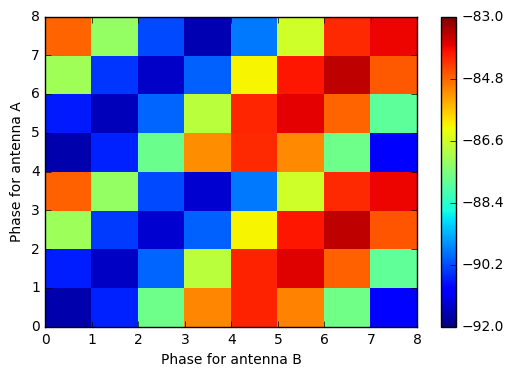

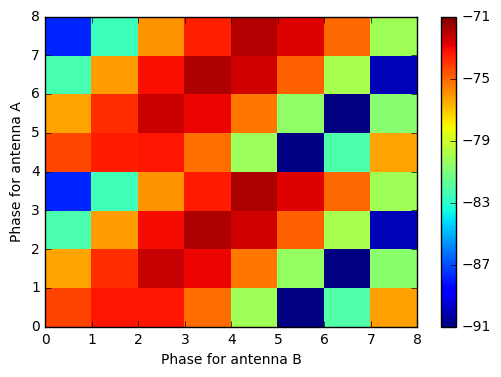

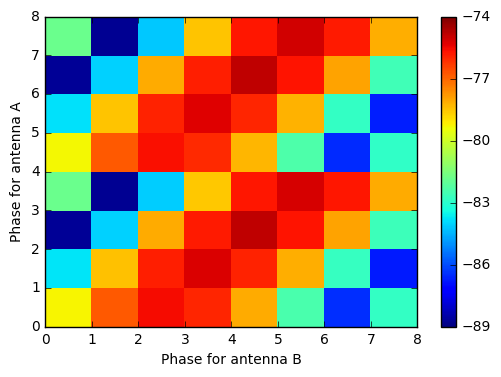

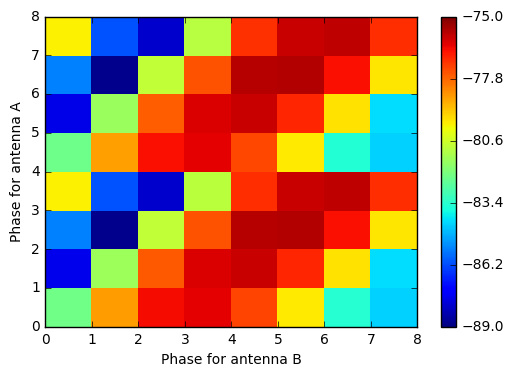

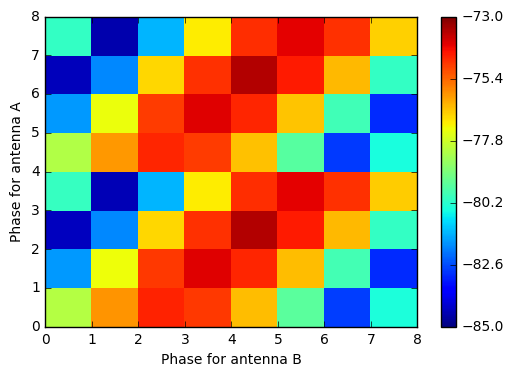

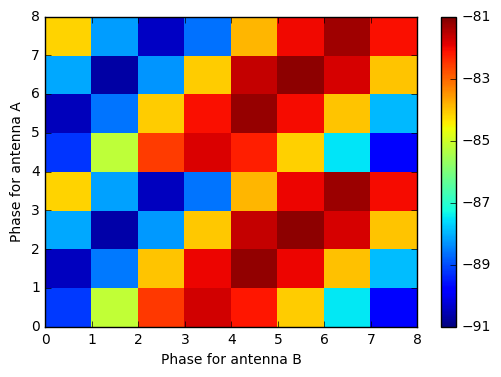

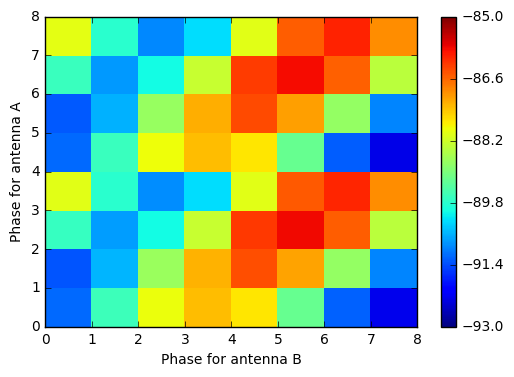

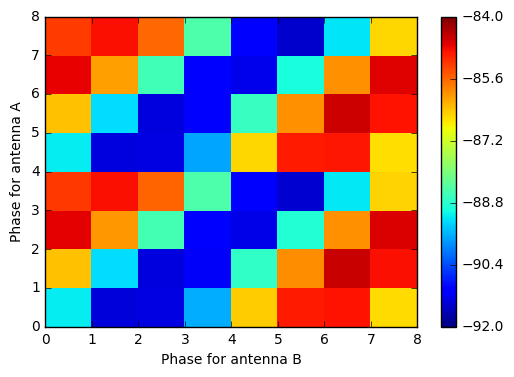

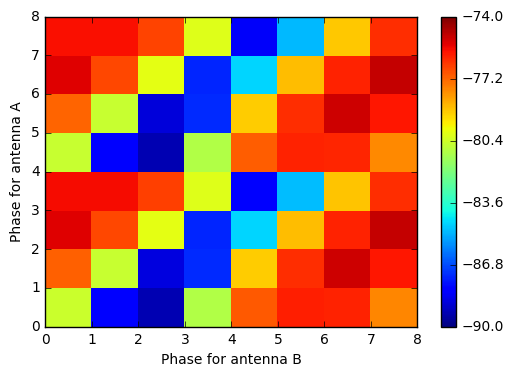

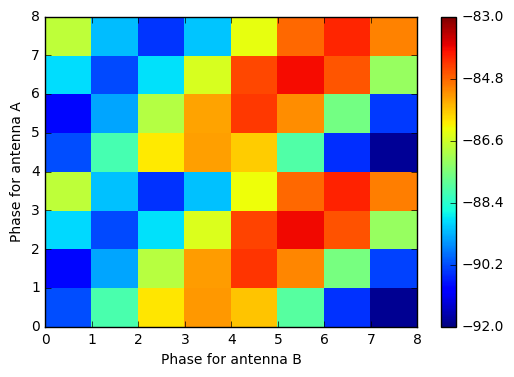

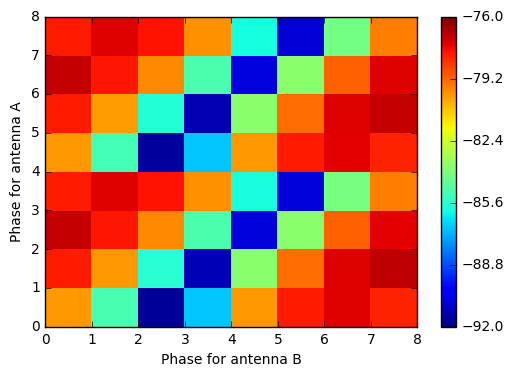

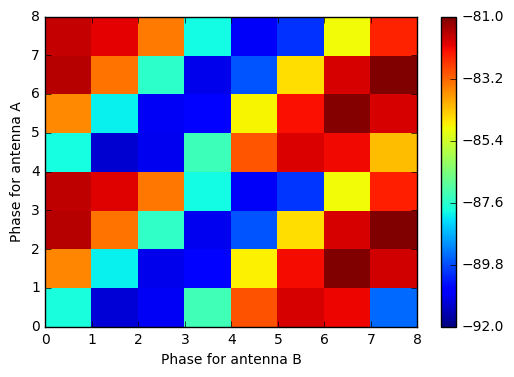

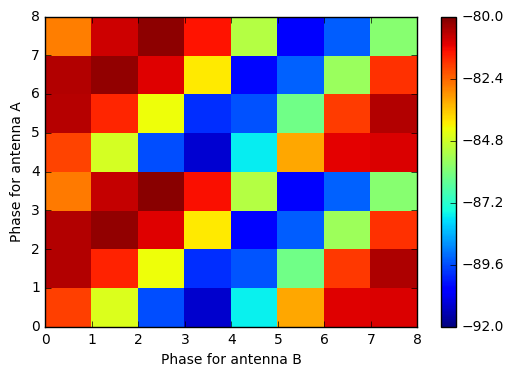

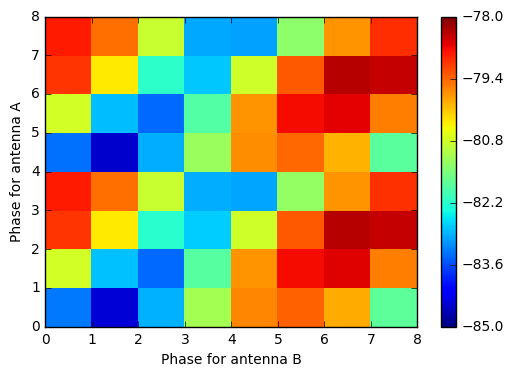

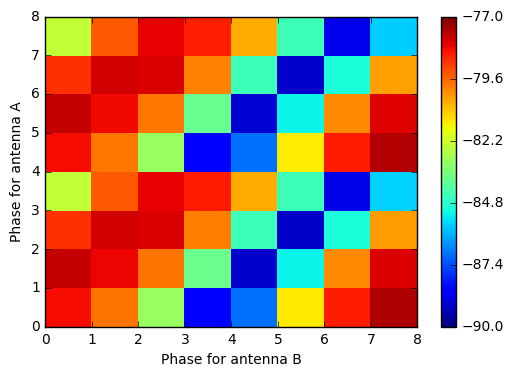

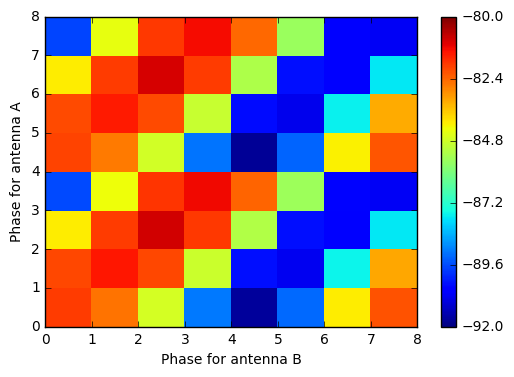

In [4]:
for node in range(16):
    fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE%d.csv'% node
    df = load_dataset(fn)
    C = compute_phase_matrix(df)
    plt.figure()
    plot_phase_matrix(C)
    plt.savefig('figures/txvar_moteA_node%d.pdf' % node)

In [18]:
rssi, lqi, prr = compute_avg_behavior('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE')
    

Computing node 0
Computing node 1
Computing node 2
Computing node 3
Computing node 4
Computing node 5
Computing node 6
Computing node 7
Computing node 8
Computing node 9
Computing node 10
Computing node 11
Computing node 12
Computing node 13
Computing node 14
Computing node 15


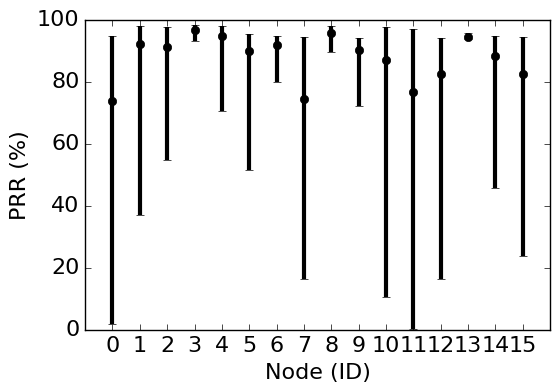

In [104]:
prr_min = np.array([np.min(prr[node].values) for node in range(16)])
prr_max = np.array([np.max(prr[node].values) for node in range(16)])
prr_avg = np.array([np.mean(prr[node].values) for node in range(16)])
prr_e = np.vstack((prr_avg - prr_min, prr_max - prr_avg))
prr_min.shape

plt.errorbar(np.arange(16), prr_avg, prr_e, fmt='ok', lw=3)
plt.ylabel('PRR (%)')
plt.xlabel('Node (ID)')
plt.xticks(np.arange(16), np.arange(16))
plt.ylim(0,100)
plt.xlim(-1,16)
plt.savefig('figures/links/testbed_prr.pdf')

6.19844955241 10.9464834809 19.1499012191


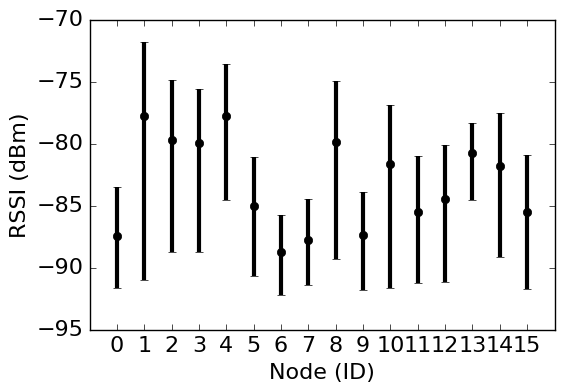

In [110]:
rssi_min = np.array([np.min(rssi[node].values) for node in range(16)])
rssi_max = np.array([np.max(rssi[node].values) for node in range(16)])
rssi_avg = np.array([np.mean(rssi[node].values) for node in range(16)])
rssi_e = np.vstack((rssi_avg - rssi_min, rssi_max - rssi_avg))
rssi_min.shape

print(np.min(rssi_max-rssi_min), np.mean(rssi_max-rssi_min), np.max(rssi_max-rssi_min))

plt.errorbar(np.arange(16), rssi_avg, rssi_e, fmt='ok', lw=3)
plt.ylabel('RSSI (dBm)')
plt.xlabel('Node (ID)')
plt.xticks(np.arange(16), np.arange(16))
plt.xlim(-1,16)
plt.savefig('figures/links/testbed_rssi.pdf')

# Spatial reuse

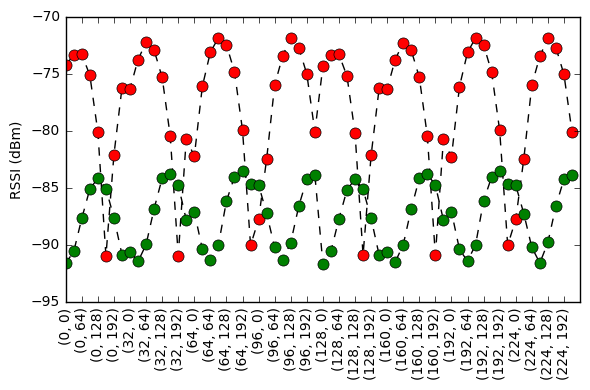

In [47]:
df0 = load_dataset(fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE%d.csv'% 0)
df1 = load_dataset('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE%d.csv'% 1)

f = plot_avg_rssi(df1)
plot_avg_rssi(df0, figure=f, mf='g')
plt.savefig('figures/spatialreuse.pdf')

In [3]:
C = testbed_phase_matrix('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/', '2016-10-05_NODE')
reuse, total = compute_spatial_reuse(8, 8, C)

In [4]:
print(total)

{2: 240, 3: 1680, 4: 7280, 5: 21840, 6: 48048, 7: 80080}


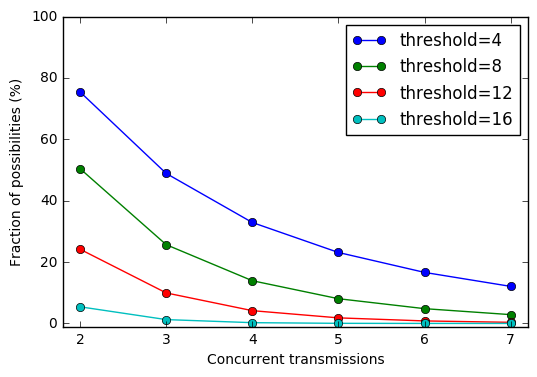

In [62]:
dir = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/'
dv = range(4, 20, 4)
x = []
for dmin in dv:
    x.append(dmin)
    reuse, total = compute_spatial_reuse(8, dmin, C, dir)
    x = sorted(reuse.keys())
    y = [len(reuse[k])/total[k]*100 for k in x]
    
    plt.plot(x,y, 'o-')
plt.xlim(1.8, 7.2)
plt.ylim(-1, 100)
plt.xlabel('Concurrent transmissions')
plt.ylabel('Fraction of possibilities (%)')
plt.legend(['threshold=%d' % x for x in dv])

# Fit

In [2]:
#rssi, lqi, prr = compute_avg_behavior('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE')
rssi, lqi, prr = compute_avg_behavior('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteC/2016-10-04_NODE')

Computing node 0
Computing node 1
Computing node 2
Computing node 3
Computing node 4
Computing node 5
Computing node 6
Computing node 7
Computing node 8
Computing node 9
Computing node 10
Computing node 11
Computing node 12
Computing node 13
Computing node 14
Computing node 15


5 -90.9814814815 -90.9431216931 -90.9933333333
7 -90.9933333333 -90.9629139073 -91.0890840652
10 -91.1101376721 -91.0992555831 -91.1079404467
17 -91.0095808383 -91.0060096154 -91.0196319018
36 -92.0746268657 -90.5772532189 -90.588172043
38 -90.588172043 -90.5474452555 -90.6084210526
44 -92.0769230769 -89.9446092977 -89.9851190476
46 -89.9851190476 -89.9628180039 -89.9842674533
53 -89.6416747809 -89.6187739464 -89.6536585366
60 -91.633431085 -90.2783505155 -90.3114754098
63 -90.2651593011 -90.2447698745 -91.3333333333
[5, 7, 10, 17, 36, 38, 44, 46, 53, 60, 63]


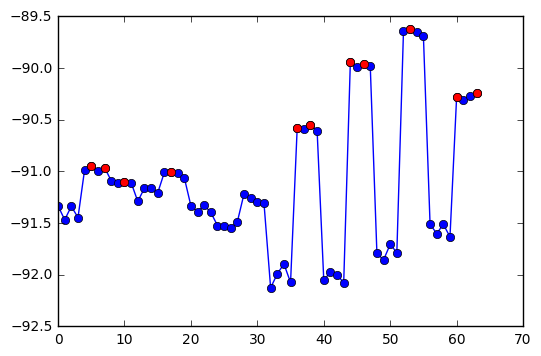

In [4]:
rssi0 = rssi[0]
y = rssi0.values
ixs = np.arange

peaks = []
yth = np.percentile(y, 60)
for x in range(64):
    x_prev = (x - 1) % 64
    x_curr = x % 64
    x_next = (x + 1) % 64
    
    y_prev = y[x_prev]
    y_curr = y[x_curr]
    y_next = y[x_next]
    
    if y_prev <= y_curr and y_curr >= y_next and y_curr >= yth:
        #print(x, x_prev, x_curr, x_next)
        print(x, y_prev, y_curr, y_next)
        peaks.append(x)
        
plt.plot(y, 'bo-')
print(peaks)
plt.plot(peaks, y[peaks], 'ro')
        



# Ebest = None
# est_offset = np.mean(y)
# for est_amplitude in np.arange(0,20):
#     for est_phase in np.arange(0, 2*np.pi, np.pi / 100):
#         E = opt_fn([est_amplitude, est_phase, est_offset])
#         E = np.sum(E*E)
#         if Ebest is None or E < Ebest:
#             Ebest = E
#             best_amplitude = est_amplitude
#             best_phase = est_phase
#             #print(Ebest, E, 'better')
#         else:
#             #print(Ebest, E)
#             pass
            

# yfit2 = best_amplitude * np.sin(best_phase + ixs) + est_offset
# plt.plot(yfit2, 'go-')

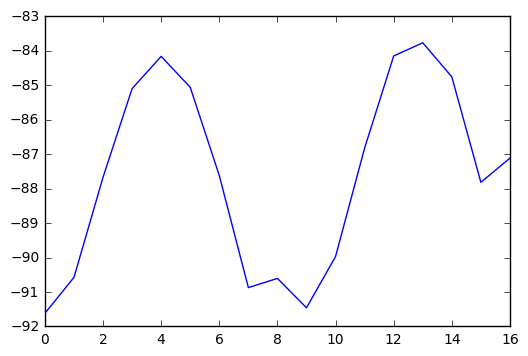

In [95]:
rssi0 = rssi[0]
y = rssi0.values
ixs = np.arange(0,64)
plt.plot(ixs[0:17],y[0:17])

In [64]:
y

array([-91.61904762, -90.57309454, -87.66673004, -85.09400749,
       -84.15934475, -85.05732484, -87.62141344, -90.8723733 ,
       -90.60507246, -91.45853659, -89.9691066 , -86.82161654,
       -84.14791474, -83.76423371, -84.75273807, -87.81479369,
       -87.11416651, -90.38121709, -91.36329588, -90.00554907,
       -86.15680362, -84.02420857, -83.49656453, -84.63551227,
       -84.74026217, -87.24605138, -90.22247446, -91.33928571,
       -89.79530807, -86.60434372, -84.22960329, -83.85837554,
       -91.6446281 , -90.58131635, -87.70781191, -85.17956368,
       -84.21496195, -85.13822813, -87.66800843, -90.89492975,
       -90.64490783, -91.5154185 , -89.98678662, -86.82813386,
       -84.16675941, -83.7830294 , -84.77449514, -87.81943646,
       -87.09133621, -90.40782284, -91.43050847, -89.99682723,
       -86.14010937, -84.04720312, -83.51403085, -84.6635791 ,
       -84.76928797, -87.2513765 , -90.2163515 , -91.5990991 ,
       -89.79311244, -86.59021637, -84.22964471, -83.87

In [28]:
drssi = [max(rssi[x]) - min(rssi[x]) for x in range(16)]
min_rssi = [min(rssi[x]) for x in range(16)]
max_rssi = [max(rssi[x]) for x in range(16)]
max_lqi = [max(lqi[x]) for x in range(16)]
min_lqi = [min(lqi[x]) for x in range(16)]

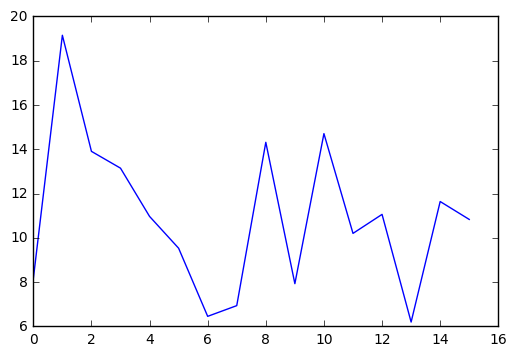

In [25]:
plt.plot(drssi)

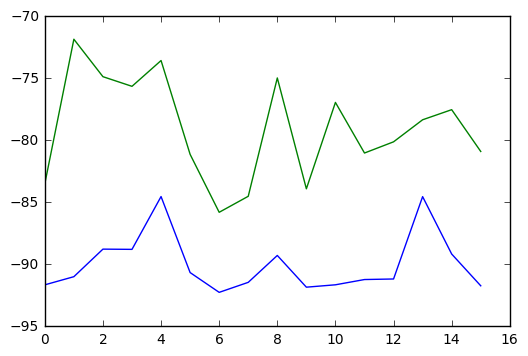

In [27]:
plt.plot(min_rssi)
plt.plot(max_rssi)

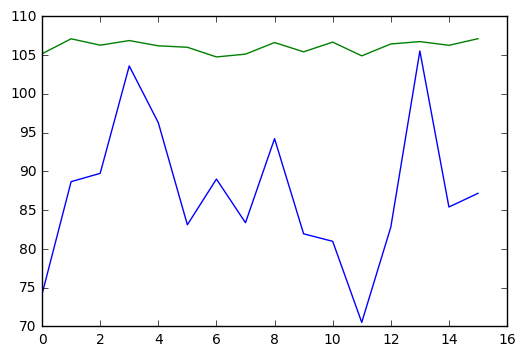

In [29]:
plt.plot(min_lqi)
plt.plot(max_lqi)